<a href="https://colab.research.google.com/github/shun0109/colab/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,SGDClassifier
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix,classification_report,mean_squared_error,precision_score, \
recall_score,f1_score,classification_report,precision_recall_curve, roc_auc_score, ConfusionMatrixDisplay
from collections import Counter
from IPython.core.display import display, HTML
import glob
%matplotlib inline

In [10]:
# !cd

In [9]:
pd.read_csv('/01_Hokkaido_20201_20251.csv', encoding="CP932")

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,取引の事情等
0,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,30分～60分,94000000,...,NaN,住宅,北西,市道,8.2,１種住居,60.0,200.0,2024年第3四半期,NaN
1,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,23,25000000,...,NaN,事務所,東,道道,15.0,１種住居,60.0,200.0,2023年第4四半期,NaN
2,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,23,16000000,...,NaN,住宅,西,市道,6.0,１低住専,40.0,80.0,2023年第4四半期,NaN
3,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,21,92000000,...,NaN,住宅,西,市道,14.5,１種住居,60.0,200.0,2023年第2四半期,NaN
4,宅地(土地と建物),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,28,78000000,...,住宅,住宅,北東,道道,15.0,１種住居,60.0,200.0,2023年第1四半期,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68841,宅地(土地と建物),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,690000,...,住宅、倉庫,住宅,北西,道道,16.0,都計外,NaN,NaN,2020年第4四半期,NaN
68842,宅地(土地),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,600000,...,NaN,NaN,南東,国道,25.0,都計外,NaN,NaN,2020年第3四半期,NaN
68843,宅地(土地と建物),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,3200000,...,住宅,住宅,接面道路無,NaN,NaN,都計外,NaN,NaN,2020年第2四半期,NaN
68844,宅地(土地),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,3000000,...,NaN,倉庫,北西,道道,14.0,都計外,NaN,NaN,2020年第1四半期,NaN


In [14]:
file_paths = glob.glob('/*.csv')

dataframes = []

for file_path in file_paths:
    temp = pd.read_csv(file_path, low_memory=False,encoding="CP932")
    dataframes.append(temp)

# Concatenate all the DataFrames into one big DataFrame
df = pd.concat(dataframes, ignore_index=True)
df

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,取引の事情等
0,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,NaN,NaN,31000000,...,NaN,NaN,西,NaN,5.0,２中住専,60.0,200.0,2021年第1四半期,NaN
1,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,水前寺公園,5,57000000,...,NaN,NaN,北西,私道,4.0,２中住専,60.0,200.0,2021年第1四半期,NaN
2,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,本荘,南熊本,20,45000000,...,NaN,NaN,西,公道,4.0,２種住居,60.0,200.0,2021年第2四半期,NaN
3,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,水前寺公園,20,39000000,...,NaN,NaN,NaN,NaN,NaN,１低住専,40.0,80.0,2021年第3四半期,NaN
4,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,本荘,河原町(熊本),5,78000000,...,NaN,NaN,南東,公道,5.0,２種住居,60.0,200.0,2021年第3四半期,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288084,宅地(土地と建物),不動産取引価格情報,住宅地,44462,大分県,玖珠郡玖珠町,大字山田,豊後森,23,16000000,...,住宅,住宅,南,町道,5.0,１中住専,60.0,200.0,2021年第4四半期,NaN
1288085,宅地(土地と建物),不動産取引価格情報,住宅地,44462,大分県,玖珠郡玖珠町,大字山田,豊後森,26,20000000,...,倉庫、店舗,事務所,北,国道,15.0,非線引き,NaN,NaN,2020年第1四半期,NaN
1288086,宅地(土地と建物),不動産取引価格情報,住宅地,44462,大分県,玖珠郡玖珠町,大字四日市,豊後森,28,200000,...,住宅,倉庫,南,県道,NaN,非線引き,NaN,NaN,2023年第4四半期,NaN
1288087,宅地(土地),不動産取引価格情報,住宅地,44462,大分県,玖珠郡玖珠町,大字四日市,豊後森,18,4800000,...,NaN,NaN,南,県道,15.0,非線引き,NaN,NaN,2023年第3四半期,NaN


In [16]:
df.columns

Index(['種類', '価格情報区分', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '取引価格（総額）', '坪単価', '面積（㎡）', '取引価格（㎡単価）', '土地の形状', '間口',
       '延床面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類',
       '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時期', '取引の事情等'],
      dtype='object')

In [19]:
df['土地の形状'].unique()

array([nan, 'ほぼ長方形', 'ほぼ正方形', 'ほぼ整形', '台形', '不整形', '長方形', 'ほぼ台形', '袋地等',
       '正方形'], dtype=object)

In [20]:
df['取引時期'].unique()

array(['2021年第1四半期', '2021年第2四半期', '2021年第3四半期', '2021年第4四半期',
       '2022年第3四半期', '2022年第4四半期', '2022年第1四半期', '2022年第2四半期',
       '2023年第1四半期', '2023年第2四半期', '2023年第3四半期', '2023年第4四半期',
       '2024年第1四半期', '2024年第2四半期', '2024年第4四半期', '2024年第3四半期',
       '2025年第1四半期', '2020年第4四半期', '2020年第3四半期', '2020年第2四半期',
       '2020年第1四半期'], dtype=object)

In [28]:
df['取引時期'].str.split(r"年第|四半期",expand=True).iloc[:,1]

,1
0,1
1,1
2,2
3,3
4,3
...,...
1288084,4
1288085,1
1288086,4
1288087,3


In [29]:
df=df.assign(取引年=df['取引時期'].str.split(r"年第|四半期",expand=True).iloc[:,0])
df=df.assign(取引四半期=df['取引時期'].str.split(r"年第|四半期",expand=True).iloc[:,1])
df[['取引年','取引四半期']].head()

,取引年,取引四半期
0,2021,1
1,2021,1
2,2021,2
3,2021,3
4,2021,3


In [46]:
df['建築年'].unique()

array(['1988年', '1999年', '2006年', '1973年', '2021年', '2017年', '2005年',
       '2020年', '1990年', nan, '2003年', '1992年', '2001年', '1997年', '1993年',
       '1984年', '1983年', '2009年', '2015年', '1977年', '1989年', '2023年',
       '2011年', '1987年', '2000年', '1978年', '1996年', '2022年', '1995年',
       '1972年', '1986年', '2019年', '1975年', '1956年', '2024年', '1968年',
       '2002年', '2010年', '1974年', '1982年', '1965年', '戦前', '1998年',
       '2025年', '1980年', '1985年', '2013年', '1970年', '1991年', '2014年',
       '1966年', '2018年', '1958年', '1994年', '2004年', '1976年', '1967年',
       '2012年', '1971年', '1979年', '2016年', '2008年', '1981年', '1969年',
       '2007年', '1960年', '1953年', '1949年', '1964年', '1962年', '1955年',
       '1950年', '1954年', '1961年', '1963年', '1951年', '1946年', '1947年',
       '1959年', '1948年', '1957年', '1952年', '2026年', '2027年'], dtype=object)

In [54]:
df=df.assign(建築年=df['建築年'].str.split(r"\年",expand=True).iloc[:,0])
df['建築年']=df['建築年'].apply(lambda x:
                          1945 if x=='戦前' else
                          x)
df['建築年'].head()

,建築年
0,1988
1,1999
2,2006
3,1999
4,1973


In [55]:
df['建築年'].unique()

array(['1988', '1999', '2006', '1973', '2021', '2017', '2005', '2020',
       '1990', nan, '2003', '1992', '2001', '1997', '1993', '1984',
       '1983', '2009', '2015', '1977', '1989', '2023', '2011', '1987',
       '2000', '1978', '1996', '2022', '1995', '1972', '1986', '2019',
       '1975', '1956', '2024', '1968', '2002', '2010', '1974', '1982',
       '1965', 1945, '1998', '2025', '1980', '1985', '2013', '1970',
       '1991', '2014', '1966', '2018', '1958', '1994', '2004', '1976',
       '1967', '2012', '1971', '1979', '2016', '2008', '1981', '1969',
       '2007', '1960', '1953', '1949', '1964', '1962', '1955', '1950',
       '1954', '1961', '1963', '1951', '1946', '1947', '1959', '1948',
       '1957', '1952', '2026', '2027'], dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288089 entries, 0 to 1288088
Data columns (total 30 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   種類          1288089 non-null  object 
 1   価格情報区分      1288089 non-null  object 
 2   地域          1096059 non-null  object 
 3   市区町村コード     1288089 non-null  int64  
 4   都道府県名       1288089 non-null  object 
 5   市区町村名       1288089 non-null  object 
 6   地区名         1287953 non-null  object 
 7   最寄駅：名称      1253020 non-null  object 
 8   最寄駅：距離（分）   1214888 non-null  object 
 9   取引価格（総額）    1288089 non-null  int64  
 10  坪単価         490214 non-null   float64
 11  面積（㎡）       1288089 non-null  object 
 12  取引価格（㎡単価）   490214 non-null   float64
 13  土地の形状       1095708 non-null  object 
 14  間口          998442 non-null   object 
 15  延床面積（㎡）     766398 non-null   object 
 16  建築年         734724 non-null   object 
 17  建物の構造       743774 non-null   object 
 18  用途          562869 non

In [70]:
df['延床面積（㎡）'].unique()

array(['135', '200', '130', '140', '210', '120', '105', '115', '315',
       '110', '145', '100', '255', '215', '95', '170', '125', '165', '80',
       '205', '70', '195', '160', '90', '85', '150', '185', '155', '55',
       '225', '240', '175', nan, '1200', '720', '280', '530', '290',
       '1100', 2000, '310', '75', '990', '340', '1000', '820', '590',
       '300', '360', '190', '690', '45', '420', '560', '250', '220',
       '1500', '65', '810', '180', '490', '830', '410', '730', '740',
       '270', '450', '800', '480', '370', '1400', '770', '330', '380',
       '430', '850', '60', '260', '50', '790', '580', '1300', '230',
       '500', '390', '970', '860', '35', '750', '780', '880', '1800',
       '630', '920', '400', '350', '1600', '640', '910', '540', '660',
       '520', '600', '510', '570', '960', '890', '610', '840', '950',
       '40', '320', '460', '680', '940', '900', '700', '710', '650',
       '1700', '550', '470', '670', '930', '760', '30', '25', '15', '265',
       '2

In [40]:
df['最寄駅：距離（分）']=df['最寄駅：距離（分）'].apply(lambda x:
                                      30 if x=='30分～60分' else
                                      60 if x=='1H～1H30' else
                                      90 if x=='1H30～2H' else
                                      120 if x=='2H～' else
                                      x)

In [42]:
# df['最寄駅：距離（分）'].unique()

In [71]:
df['面積（㎡）']=df['面積（㎡）'].apply(lambda x:
                              2000 if x=='2,000㎡以上' else
                              x)

df['延床面積（㎡）']=df['延床面積（㎡）'].apply(lambda x:
                              2000 if x=='2,000㎡以上' else
                              10 if x=='10㎡未満' else
                              x)

In [72]:
df[['最寄駅：距離（分）','建築年','面積（㎡）','延床面積（㎡）','取引年','取引四半期']]=df[['最寄駅：距離（分）',
                                                            '建築年','面積（㎡）',
                                                            '延床面積（㎡）',
                                                            '取引年',
                                                            '取引四半期']].astype(float)

In [73]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,延床面積（㎡）,建築年,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,取引年,取引四半期
count,1288089.0,1214888.0,1288089.0,490214.0,1288089.0,490214.0,766398.0,734724.0,1226364.0,1216257.0,1216144.0,1288089.0,1288089.0
mean,20398.2,24.1,35746689.0,319214.5,310.4,96581.7,154.6,2000.4,6.7,59.2,183.2,2022.1,2.5
std,11789.9,23.5,217605447.4,732135.9,373.5,221629.0,207.1,19.4,4.9,9.3,79.8,1.5,1.1
min,1101.0,0.0,100.0,2.0,10.0,1.0,10.0,1945.0,0.5,6.0,2.0,2020.0,1.0
25%,12105.0,10.0,7300000.0,45000.0,120.0,14000.0,95.0,1984.0,4.0,60.0,150.0,2021.0,1.0
50%,20202.0,18.0,20000000.0,130000.0,185.0,39000.0,105.0,2001.0,6.0,60.0,200.0,2022.0,2.0
75%,27321.0,30.0,36000000.0,320000.0,310.0,97000.0,130.0,2020.0,7.0,60.0,200.0,2023.0,3.0
max,47382.0,120.0,170000000000.0,100000000.0,2000.0,31000000.0,2000.0,2027.0,818.1,960.0,8020.0,2025.0,4.0


In [59]:
print(df.isna().sum())

種類                  0
価格情報区分              0
地域             192030
市区町村コード             0
都道府県名               0
市区町村名               0
地区名               136
最寄駅：名称          35069
最寄駅：距離（分）       73201
取引価格（総額）            0
坪単価            797875
面積（㎡）               0
取引価格（㎡単価）      797875
土地の形状          192381
間口             289647
延床面積（㎡）        521691
建築年            553365
建物の構造          544315
用途             725220
今後の利用目的        398845
前面道路：方位         32348
前面道路：種類         56155
前面道路：幅員（ｍ）      61725
都市計画             3588
建ぺい率（％）         71832
容積率（％）          71945
取引時期                0
取引の事情等        1226092
取引年                 0
取引四半期               0
dtype: int64


In [74]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the number of unique classes for each categorical column
for column in categorical_columns:
    num_unique = df[column].nunique()
    print(f"Column: {column}, Number of unique classes: {num_unique}")

Column: 種類, Number of unique classes: 2
Column: 価格情報区分, Number of unique classes: 2
Column: 地域, Number of unique classes: 4
Column: 都道府県名, Number of unique classes: 47
Column: 市区町村名, Number of unique classes: 1886
Column: 地区名, Number of unique classes: 55084
Column: 最寄駅：名称, Number of unique classes: 8499
Column: 土地の形状, Number of unique classes: 9
Column: 間口, Number of unique classes: 498
Column: 建物の構造, Number of unique classes: 28
Column: 用途, Number of unique classes: 249
Column: 今後の利用目的, Number of unique classes: 6
Column: 前面道路：方位, Number of unique classes: 9
Column: 前面道路：種類, Number of unique classes: 15
Column: 都市計画, Number of unique classes: 16
Column: 取引時期, Number of unique classes: 21
Column: 取引の事情等, Number of unique classes: 22


In [76]:
# df.都道府県名.unique()

/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 30010 (\N{CJK UNIFIED IDEOGRAPH-753A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2842200526.py:9: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from fon

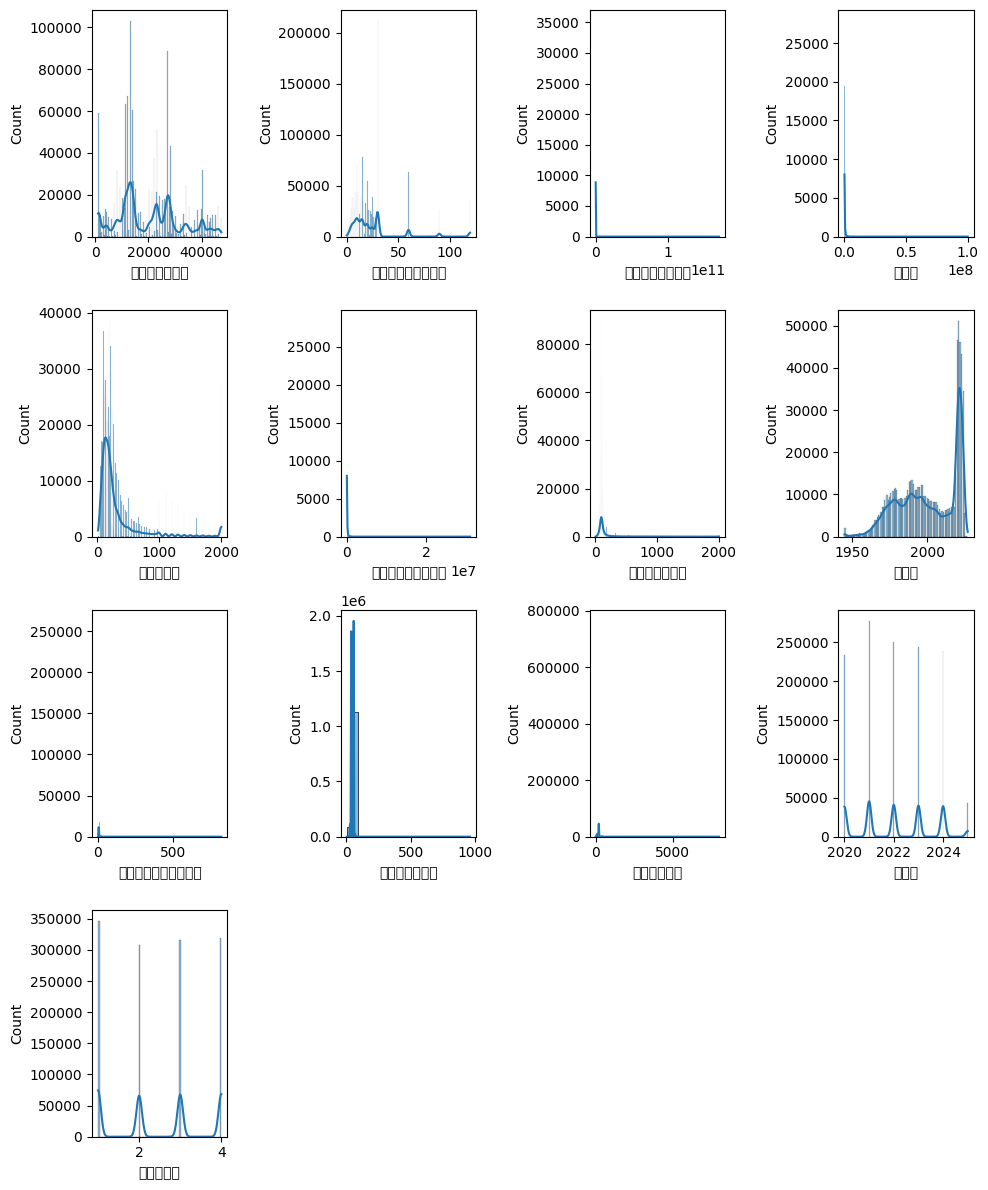

In [79]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Plotting histograms for each numerical data column
plt.figure(figsize=(10, 12))
for i, column in enumerate(numerical_columns):
    ax = plt.subplot(len(numerical_columns) // 4 + 1, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True)

plt.tight_layout()
plt.show()

In [78]:
df.select_dtypes(include=['number']).columns

Index(['市区町村コード', '最寄駅：距離（分）', '取引価格（総額）', '坪単価', '面積（㎡）', '取引価格（㎡単価）',
       '延床面積（㎡）', '建築年', '前面道路：幅員（ｍ）', '建ぺい率（％）', '容積率（％）', '取引年', '取引四半期'],
      dtype='object')